In [1]:
#general purpose libraries 
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# importing dataset
df = pd.read_csv('drive/MyDrive/sample30.csv' , encoding='latin-1')

In [6]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
#data exploration
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [9]:
df['user_sentiment'].describe()

count        29999
unique           2
top       Positive
freq         26632
Name: user_sentiment, dtype: object

In [10]:
df['reviews_rating'].describe()

count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [11]:
df['reviews_rating'].describe()

count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [12]:
df['user_sentiment'].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

In [13]:
df['reviews_rating'].value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

In [14]:
#df.drop(df.columns.difference(['id','name','reviews_text','reviews_rating','user_sentiment']), 1, inplace=True)
df = df.drop(columns=['reviews_didPurchase', 'reviews_doRecommend', 'reviews_userCity', 'reviews_userProvince'])

In [15]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


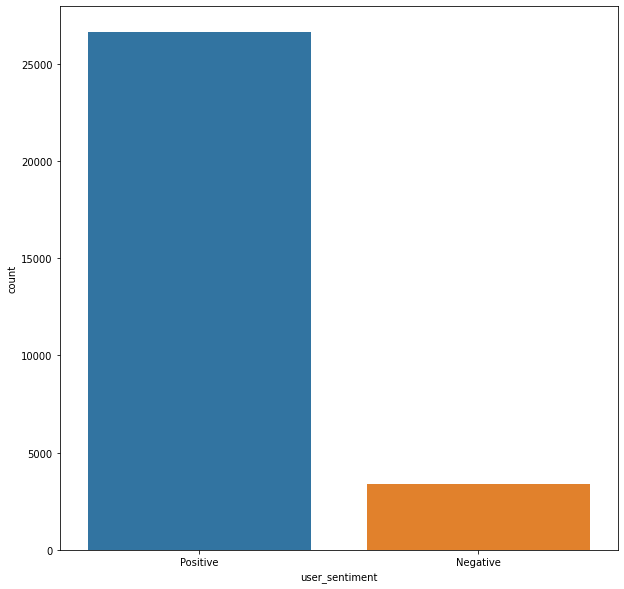

In [16]:
#plotting and data distribution
plt.figure(figsize=(10,10))
sns.countplot(x="user_sentiment", data=df)
plt.show()

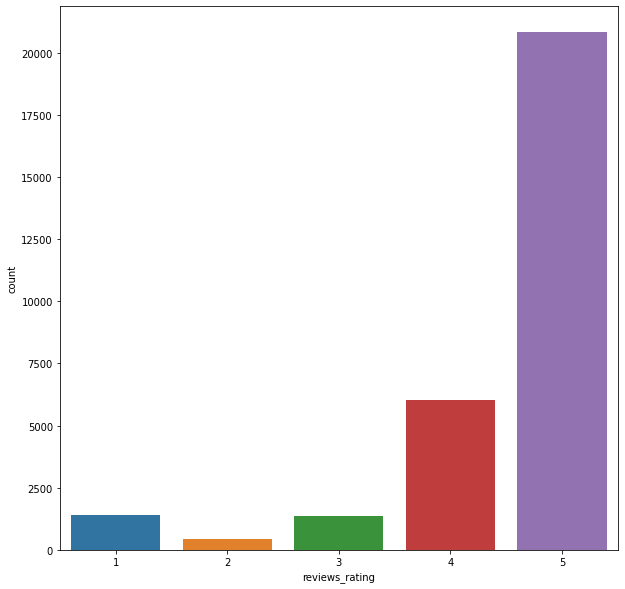

In [17]:
#plotting Rating data distribution
plt.figure(figsize= (10,10))
sns.countplot(x='reviews_rating', data= df)
plt.show()

### **Text Preprocessing**

In [18]:
df.size

330000

In [19]:
#dropping nan values
df.dropna(inplace = True)

In [20]:
df.size

325226

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29566 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29566 non-null  object
 1   brand             29566 non-null  object
 2   categories        29566 non-null  object
 3   manufacturer      29566 non-null  object
 4   name              29566 non-null  object
 5   reviews_date      29566 non-null  object
 6   reviews_rating    29566 non-null  int64 
 7   reviews_text      29566 non-null  object
 8   reviews_title     29566 non-null  object
 9   reviews_username  29566 non-null  object
 10  user_sentiment    29566 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


In [22]:
df["user_sentiment"] = df['reviews_rating'].apply(lambda x: 1 if (x >= 3) else 0)

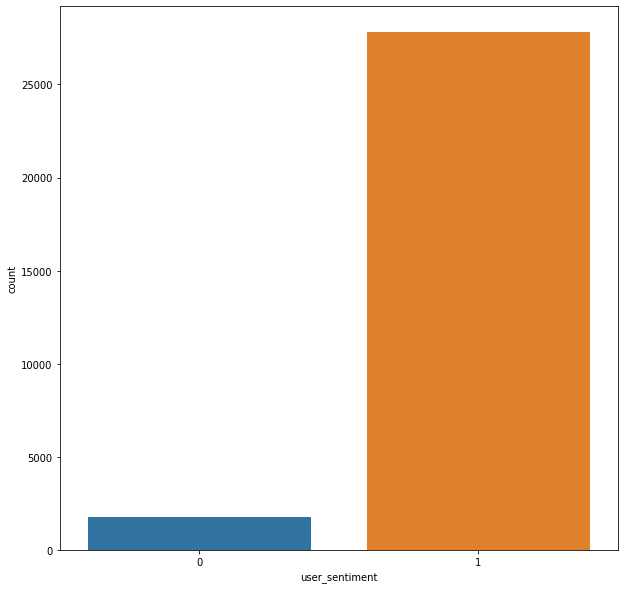

In [23]:
#plotting and data distribution
plt.figure(figsize=(10,10))
sns.countplot(x="user_sentiment", data=df)
plt.show()

In [24]:
#di = {"Positive": 1, "Negative": 0}
#df["user_sentiment"].replace(di, inplace=True)

In [25]:
#converting into string
df['reviews_text'] = df['reviews_text'].astype('str')
df['user_sentiment'] = df['user_sentiment'].astype('int')

In [26]:
# Remove punctuation 
df['reviews_text'] = df['reviews_text'].str.replace('[^\w\s]','')

In [27]:
# Remove Stopwords
stop = stopwords.words('english')
df['reviews_text'] = df['reviews_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [28]:
def scrub_words(text):
  """Basic cleaning of texts."""
  
  #remove non-ascii and digits
  text=re.sub("(\\W|\\d)"," ",text)
  
  #remove whitespace
  text = text.strip()
  text = re.sub(' +', ' ',text)

  return text

In [29]:
df['reviews_text']= df['reviews_text'].apply(lambda x: scrub_words(x))

In [30]:
df['reviews_text'] = df['reviews_text'].str.lower()

In [31]:
#cleaned text to excel
df.to_csv("drive/MyDrive/clean_text.csv")

In [32]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [33]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [34]:
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [35]:
df['reviews_text'] = df['reviews_text'].apply(lambda x: lemmatize_sentence(x))

In [36]:
x= df['reviews_text']
y= df['user_sentiment']
print(x.shape)
print(y.shape)

(29566,)
(29566,)


In [37]:
no_of_classes= len(pd.Series(y).value_counts())

In [38]:
#Distribution of the target variable data in terms of proportions.
for i in range(1,no_of_classes+1):
  print("Percent of {0}s: ".format(i), round(100*pd.Series(y).value_counts()[i-1]/pd.Series(y).value_counts().sum(),2), "%")

Percent of 1s:  5.95 %
Percent of 2s:  94.05 %


In [39]:
# Split the dataset into test and train
seed = 50 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [40]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',    # Remove accents and perform other character normalization during the preprocessing step. 
    analyzer='word',            # Whether the feature should be made of word or character n-grams.
    token_pattern=r'\w{1,}',    # Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'
    ngram_range=(1, 3),         # The lower and upper boundary of the range of n-values for different n-grams to be extracted
    stop_words='english',
    sublinear_tf=True)
word_vectorizer.fit(X_train)    # Fiting it on Train
train_word_features = word_vectorizer.transform(X_train)  # Transform on Train

In [41]:
## transforming the train and test datasets
X_train_transformed = word_vectorizer.transform(X_train.tolist())
X_test_transformed = word_vectorizer.transform(X_test.tolist())

# # Print the shape of each dataset.
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)
print('X_test_transformed', X_test_transformed.shape)
print('y_test', y_test.shape)

X_train_transformed (20696, 341727)
y_train (20696,)
X_test_transformed (8870, 341727)
y_test (8870,)


# `Logistic Regression Model`

In [42]:
# Build the Logistic Regression model.
time1 = time.time()
logit = LogisticRegression()
logit.fit(X_train_transformed,y_train)
time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 4.10 seconds


In [43]:
# Prediction Train Data
y_pred_train= logit.predict(X_train_transformed)

#Model Performance on Train Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Logistic Regression accuracy 0.9651140316969463
              precision    recall  f1-score   support

           0       0.43      0.99      0.60       540
           1       1.00      0.96      0.98     20156

    accuracy                           0.97     20696
   macro avg       0.71      0.97      0.79     20696
weighted avg       0.98      0.97      0.97     20696



In [44]:
# Prediction Test Data
y_pred_test = logit.predict(X_test_transformed)

#Model Performance on Test Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

Logistic Regression accuracy 0.9660653889515219
              precision    recall  f1-score   support

           0       0.43      0.97      0.59       225
           1       1.00      0.97      0.98      8645

    accuracy                           0.97      8870
   macro avg       0.71      0.97      0.79      8870
weighted avg       0.98      0.97      0.97      8870



In [45]:
#class imbalance handling
counter  = Counter(y_train)
print('Before', counter)

# download imblearn library
sm = SMOTE()

# transform the dataset
X_train_transformed_sm, y_train_sm = sm.fit_resample(X_train_transformed, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1: 19450, 0: 1246})
After Counter({1: 19450, 0: 19450})


In [46]:
# Building the Logistic Regression model
time1 = time.time()

logit_sm = LogisticRegression()
logit_sm.fit(X_train_transformed_sm,y_train_sm)

time_taken = time.time() - time1
print('Time Taken in logestic regression with smote: {:.2f} seconds'.format(time_taken))

Time Taken in logestic regression with smote: 9.57 seconds


In [47]:
# Prediction Train Data
y_pred_train_sm= logit_sm.predict(X_train_transformed_sm)

#Model Performance on Train Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_train_sm, y_train_sm))
print(classification_report(y_pred_train_sm, y_train_sm))

Logistic Regression accuracy 0.9972750642673522
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19546
           1       0.99      1.00      1.00     19354

    accuracy                           1.00     38900
   macro avg       1.00      1.00      1.00     38900
weighted avg       1.00      1.00      1.00     38900



In [48]:
# Prediction Test Data
y_pred_test = logit_sm.predict(X_test_transformed)

print("Logistic Regression accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

Logistic Regression accuracy 0.9591882750845547
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       618
           1       0.97      0.98      0.98      8252

    accuracy                           0.96      8870
   macro avg       0.86      0.80      0.83      8870
weighted avg       0.96      0.96      0.96      8870

[[ 384  234]
 [ 128 8124]]


# **`Imblearn import over_sampling`**

In [49]:
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=0)

In [50]:
# Split test and train
seed = 50 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [51]:
# Oversampling the dataset.
X_train, y_train = ros.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))

In [52]:
X_train = pd.DataFrame(X_train).iloc[:,0].tolist()

In [53]:
# transforming the train and test datasets

X_train_transformed = word_vectorizer.transform(X_train)
X_test_transformed = word_vectorizer.transform(X_test.tolist())

In [54]:
X_test_transformed.shape

(8870, 341727)

In [55]:
y_train.shape

(38900,)

# **Random Forest Model**

In [56]:
# Building Random Forest Model.
time1 = time.time()

classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
classifier.fit(X_train_transformed,y_train)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 79.55 seconds


In [57]:
#Prediciton training data
y_pred_train = classifier.predict(X_train_transformed)
print('Random forest model accuracy : ', accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Random forest model accuracy :  0.9995629820051414
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19433
           1       1.00      1.00      1.00     19467

    accuracy                           1.00     38900
   macro avg       1.00      1.00      1.00     38900
weighted avg       1.00      1.00      1.00     38900



In [58]:
# Prediction Test Data
y_pred_test = classifier.predict(X_test_transformed)

print("Random Forest Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

Random Forest Model accuracy 0.9675310033821871
              precision    recall  f1-score   support

           0       0.45      0.98      0.61       232
           1       1.00      0.97      0.98      8638

    accuracy                           0.97      8870
   macro avg       0.72      0.97      0.80      8870
weighted avg       0.99      0.97      0.97      8870



# **Naive Bayes**

In [59]:
# Take random sampling
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20696,)
(8870,)
(20696,)
(8870,)


In [61]:
vect = CountVectorizer(stop_words='english')

In [62]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [63]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed = vect.transform(X_test)

In [64]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

## Training data prediction

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_train = bnb.predict(X_train_transformed)

# predict probability
#y_pred_proba = bnb.predict_proba(X_train_transformed)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 94.04%


In [65]:
## Test data

# predict class
y_test_pred = bnb.predict(X_test_tranformed)

# predict probability
#y_pred_proba =bnb.predict_proba(X_test_tranformed)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.09%


# **`xgboost`**

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

cv = CountVectorizer(max_features=5000, encoding="utf-8",  
      ngram_range = (1,3),  
      token_pattern = "[A-Za-z_][A-Za-z\d_]*")


In [67]:
X = cv.fit_transform(df['reviews_text'] ).toarray()
y = df['user_sentiment']

In [68]:
pickle.dump(cv, open('drive/MyDrive/vectorizer.pickle', 'wb'))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
      test_size=0.33, 
      random_state=0)

In [70]:
print(X_train.shape)
print(y_train.shape)

(19809, 5000)
(19809,)


In [71]:
#class imbalance handling
counter  = Counter(y_train)
print('Before', counter)

# download imblearn library
sm = SMOTE()

# transform the dataset
X_train_transformed_sm, y_train_sm = sm.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1: 18617, 0: 1192})
After Counter({1: 18617, 0: 18617})


In [72]:
# fit model no training data

model = XGBClassifier()
model.fit(X_train_transformed_sm, y_train_sm)

# make predictions for test data
y_pred_train = model.predict(X_train_transformed_sm)
predictions = [round(value) for value in y_pred_train]

# evaluate predictions
accuracy = accuracy_score(y_train_sm, predictions)
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_pred_train, y_train_sm))

Training Accuracy: 91.64%
[[17666  2163]
 [  951 16454]]


In [73]:
y_pred_test = model.predict(X_test)
predictions = [round(value) for value in y_pred_test]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_pred_test, y_test))

Test Accuracy: 86.91%
[[ 416 1127]
 [ 150 8064]]


Logistic Regression --> 96 %
Random Forest. --> 96 5
Navie Bayes --> 94 %
XGBoost --> 96.78 %
So here almost except ramdom forest all other model giving 96% around so choosing XGBoost

In [74]:
#Dumping to pickle file
pickle.dump(model, open('drive/MyDrive/model.pickle', 'wb'))